In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import chi2_contingency
import seaborn as sns

In [2]:
# read the CSV file with the dataset
dataset_df = pd.read_csv('dataset', low_memory=False)
#dataset_df.keys()

In [3]:
# Cleaning the dataset
# Narrow down the dataset to view region and severity of Covid
residence_df = dataset_df[['der_region_v2', 'urban_rural', 'der_site_type', 'severity_of_covid_19_v2']]

# Clean the dataset to remove any NAN fields
nonNaN_residence_df = residence_df.dropna()

# Remove any non-US and other data
US_residence_df = nonNaN_residence_df.loc[(nonNaN_residence_df['der_region_v2'] != 'Non-US') | (nonNaN_residence_df['der_region_v2'] != 'Other')]

# Remove unknown residence 
US_residence_df_clean = US_residence_df.loc[(US_residence_df['urban_rural'] != 'Unknown') | (US_residence_df['der_region_v2'] != 'Other')]

# Display a sample of the clean dataset 
US_residence_df_clean.sample(10)


,der_region_v2,urban_rural,der_site_type,severity_of_covid_19_v2
453,Midwest,Urban,Academic Medical Center,Mild
909,West,Rural,Community Practice,Mild
976,Northeast,Urban,Tertiary Care Center,Mild
742,South,Urban,Academic Medical Center,Mild
1296,South,Urban,Academic Medical Center,Mild
291,Northeast,Rural,Tertiary Care Center,Mild
992,Northeast,Suburban,Community Practice,Severe
917,West,Rural,Community Practice,Mild
1242,South,Suburban,Community Practice,Mild
1033,Northeast,Suburban,Community Practice,Moderate


## How many Breast-Cancer patients that were diagnosed with Covid-19 lived in urban, suburban, and rural area?

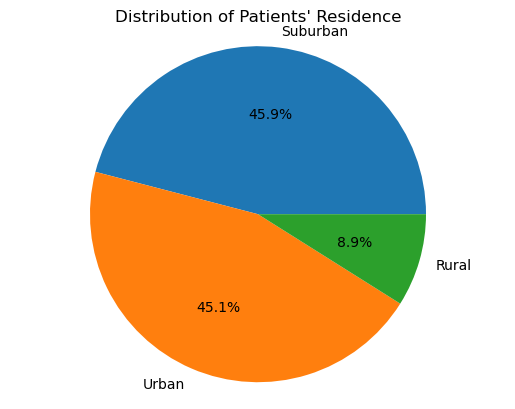

In [4]:
# Create a pie chart for the patients living in urban, suburban, and rural
residence_counts = US_residence_df_clean['urban_rural'].value_counts()
plt.pie(residence_counts, labels=residence_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Distribution of Patients' Residence")
plt.show()

## How is the severity of Covid-19 affected by the type of residence? 

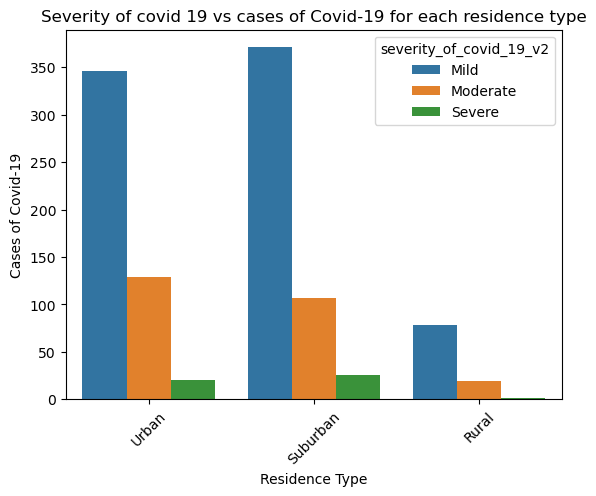

In [5]:
# Severity of Covid vs the type of residence

barplot = sns.countplot(US_residence_df_clean, x = 'urban_rural', hue = 'severity_of_covid_19_v2')

plt.title("Severity of covid 19 vs cases of Covid-19 for each residence type")
plt.xlabel("Residence Type")
plt.ylabel("Cases of Covid-19")
plt.xticks(rotation=45)
plt.show()


In [6]:
# Statistical Analysis 
# Create the df with analysis 

urban_stats = pd.DataFrame(US_residence_df_clean[US_residence_df_clean['urban_rural'] == 'Urban']['severity_of_covid_19_v2']).value_counts()
suburban_stats = pd.DataFrame(US_residence_df_clean[US_residence_df_clean['urban_rural'] == 'Suburban']['severity_of_covid_19_v2']).value_counts()
rural_stats = pd.DataFrame(US_residence_df_clean[US_residence_df_clean['urban_rural'] == 'Rural']['severity_of_covid_19_v2']).value_counts()

statistical_df = pd.DataFrame(
    {
    'urban': urban_stats,
    'suburban': suburban_stats,
    'rural': rural_stats
}
)
print(statistical_df)

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(statistical_df)

# Print the results
print("\nChi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)


                         urban  suburban  rural
severity_of_covid_19_v2                        
Mild                       346       371     78
Moderate                   129       107     19
Severe                      20        26      1

Chi-Square Statistic: 7.828481421075093
P-value: 0.09806708899050096
Degrees of Freedom: 4


# Analysis 

    In this part of the analysis, the residence of the patients' has been studied. By residence, the analysis means if the patient lived in an urban, suburban, or rural setting. The first part of this analysis explores how many cases of Covid-19 were reported in each residence type. By just examining the pie chart, the suburban type had the most amount of cases reported followed by urban and then rural. This suggests that living in the suburbs or the city would have a higher chance of getting Covid-19. However, it should also be noted that there is a higher population living in suburbs and city compared to rural areas that the dataset does not consider. 
    
    Moreover, the analysis examines the severity of Covid-19 in each respective residence type. For this case, the severity is divided into 3 categories, mild, morderate, and severe. The null hypothesis is that the severity of Covid-19 is not affected by the type of residence. On the other hand, the alternate hypothesis is that the type of residence has an affect on the severity of Covid-19. In order to answer this hypothesis, the bar graphs were examined. The bar graphs show the number of cases reported as mild, morderate, or severe in each of the residence types. By visually inspecting the graphs, it would appear that there is a trend in the number of cases reported. The mild cases are very high, the morderate cases are about a quarter of the mild cases, and the severe cases are about one fifth of the morderate cases. This trend is similar in all three cases which suggests that there is no relevant association between the severity of Covid-19 and the type of residence. To futher examine this, the chi-square contingency test was performed yielding a p-value of 0.07. If the common threshold of 0.05 is used then the null hypothesis is acceptable. This means that there is no association between the type of residence and the severity of Covid-19. 
    
    Even though the null hypothesis is accepted, it should be noted that the p-value was very close to the threshold. This suggests that there might be some sort of association between the two factors. The analysis is limited by a number of factors such as the amount of data working with. The number of cases for rural areas are significantly lower than in other residence types, therefore, with more data, the result might lean on the alternate hypothesis. 





